# **Part B - Applications**


> PREDICTIONS ON TETUAN -- An exercise on Linear Regression



In this tutorial, we are going to use a record of [Tetuan city's power consumption](https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city#) to practice linear regression in detail.

In [ ]:
#importing files for data manipulation
import pandas as pd
from google.colab import files
tetuan= pd.read_csv('/content/Tetuan City power consumption.csv')

#converting into a dataframe and viewing the result
tetuan=pd.DataFrame(tetuan)
tetuan

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


Let us know about the dataset now:

In [ ]:
tetuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


This has 8 numerical attributes and one non-numerical attribute. All the attributes seem to be in no need of changes so we are fine here.

Let us check for missing values and duplicates.

In [ ]:
#checking total number of missing values in the dataset
total_missing_values = tetuan.isnull().sum().sum()
print(total_missing_values)

#checking for duplicates and summing them
duplicate_rows = tetuan.duplicated()
num_duplicate_rows = duplicate_rows.sum()
print(num_duplicate_rows)

0
0


There are no missing or duplicate values in this dataset, so we can correlate the variables, and then carry on with questions.

<Axes: >

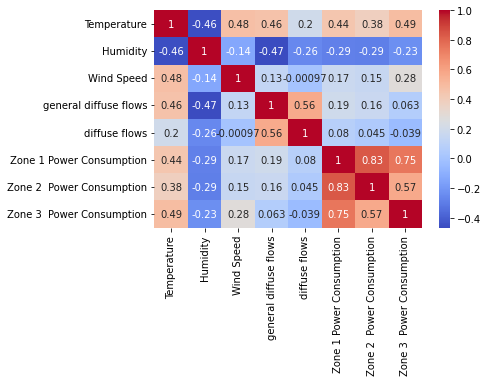

In [ ]:
#importing seaborn library
import seaborn as sns

#creating correlation matrix
sns.heatmap(tetuan.corr(), cmap='coolwarm', annot=True)

###1. Use **'Temperature'** as the independent variable and **'power consumption of Zone 1'** as the dependent variable to conduct a simple linear regression.

According to the correlation matrix, the `Temperature` variable has the highest positive correlation with `Zone 3 Power Comsumption` and the highest negative correlatiion with `Humidity`.

The given output `Zone 1 Power Consumption` has a medium positive correlation of 0.44.



Before we use a linear regression model to predict `Zone 1 Power Consumption`,  we have to check the 4 main assumptions of linear regression first:

1. The true relationship is linear

2. Errors are normally distributed

3. Homoscedasticity of errors (or, equal variance around the line).

4. Independence of the observations

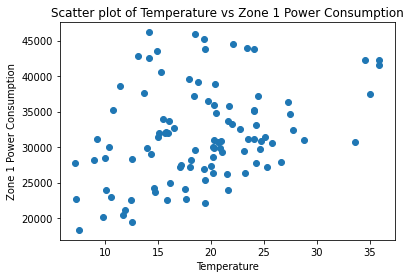

In [ ]:
#importing matplotlib pyplot as plt
import matplotlib.pyplot as plt

#checking linearity between x and y
x = tetuan['Temperature'].sample(n=100, random_state=1)
y = tetuan['Zone 1 Power Consumption'].sample(n=100, random_state=1)
plt.scatter(x, y)
plt.title("Scatter plot of Temperature vs Zone 1 Power Consumption")
plt.xlabel("Temperature")
plt.ylabel("Zone 1 Power Consumption")
plt.show()

**1ST ASSUMPTION CONCLUSION:** There is a weak linear relationship between x and y variables but I don't think it is sufficient enough to state that x and y are strictly linear.

Let us check the next assumption of normally distributed errors:

For this we implement the LR model and then create a histogram or a density plot of the residuals. Residuals are the differences between the actual values and the predicted values of the dependent variable.

##Implementing the model:

For this question we import the libraries and ml models needed, set the variables, split the data into a training and testing sets and train the model.

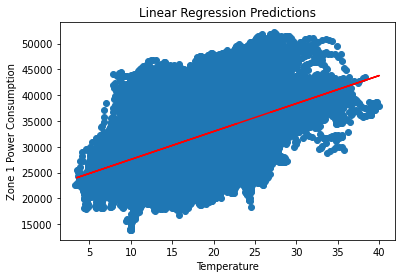

In [ ]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#reshaping and setting x, y as the independent and dependent variables
X = tetuan['Temperature'].values.reshape(-1,1)
y = tetuan['Zone 1 Power Consumption'].values.reshape(-1,1)

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating the regression model
lr = LinearRegression()

#training the model on the training data
lr.fit(X_train, y_train)

#making predictions on the testing data
y_pred = lr.predict(X_test)

#plotting the data and the regression line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Temperature')
plt.ylabel('Zone 1 Power Consumption')
plt.title('Linear Regression Predictions')

plt.show()


We then test and evaluate this model using MAE, MSE and R2, which are metrics used to evaluate the performance of a regression model.


*   **MAE (Mean Absolute Error)** measures the average difference between the actual and predicted values. MAE GIVES EQUAL WEIGHT TO ALL ERRORS and a lower value indicates better performance.

* **MSE (Mean Squared Error)** is calculated by taking the average of the squared differences between the actual and predicted values. MSE gives more weight to larger errors, and a lower value indicates better performance.

*   **R-squared (R2)** measures how well the model fits the data, and ranges from 0 to 1, with a higher value indicating a better fit.

In [ ]:
#calculating the MSE, MAE and R2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#calculating the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

#calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

#calculating the R-squared score
r2 = r2_score(y_test, y_pred)

#printing the metrics
print("MAE:", mae)
print("MSE:", mse)
print("R2 score:", r2)

MAE: 5206.860390734544
MSE: 40658128.98831766
R2 score: 0.1947990285164446


The R2 value for this model is approximately 0.19, which indicates that the model is a poor fit for the given pair of variables.

##Residual calculation:

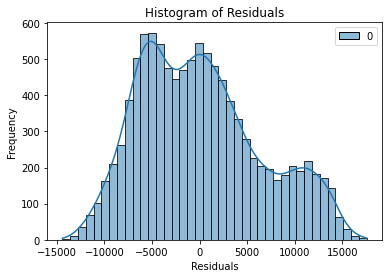

In [ ]:
#calculating the residual values
residuals = y_test - y_pred

#plotting the histogram of the residuals
sns.histplot(residuals, kde=True, color="blue")
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

If the histogram or density plot of the residuals is approximately bell-shaped and symmetric, then the assumption of normally distributed errors is likely met. However, if the plot is skewed or has multiple peaks, then the assumption may be violated.

Let us isolate the density curve and examine further:

Text(0.5, 1.0, 'Residual Plot')

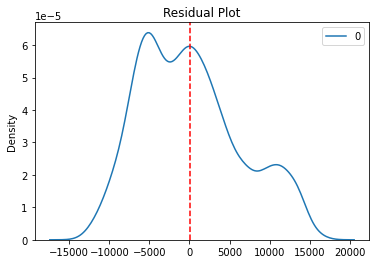

In [ ]:
#isolating the curve
sns.kdeplot(residuals, color="red")

#addinga vertical line at the mean of the residuals
plt.axvline(x=residuals.mean(), color='r', linestyle='--')
plt.title('Residual Plot')

**2ND ASSUMPTION CONCLUSION:** Unfortunately. the residual curve has a weak normal distribution.

Let us go ahead and check the third assumption of homoscedasticity of errors:

To check for this, we plot the residuals against the predicted values. If the points on the plot are randomly scattered and don't follow any particular pattern, it indicates that the errors are homoscedastic.

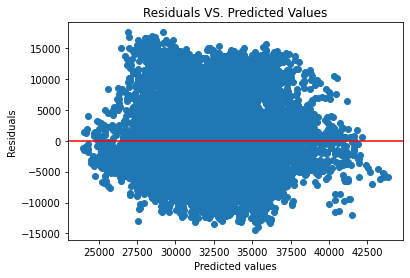

In [ ]:
import statsmodels.api as sm

#creating a scatter plot of residuals vs predicted values
fig, ax = plt.subplots()
ax.scatter(y_pred, residuals)
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals VS. Predicted Values')
plt.axhline(y=0, color='red')
plt.show()

**3RD ASSUMPTION CONCLUSION:** The above plot has a weak symmetry across the line. The residuals seem to be randomly scattered around the horizontal line at zero, with no discernible pattern or trend. This safely indicates that the variance of the errors is the same across all levels of the predictor variable, which is a desirable property for a linear regression model.

Let us check for the last assumption of independence of observations:

This assumption in linear regression can also be checked by plotting the residuals against the predicted values. This plot must show a random scatter of points with no clear pattern or trend. If there is a pattern or trend, it suggests that the model is not capturing all the relevant information in the data and violating the independence of observations assumption.

From the above graph, we can sense a very slight pattern. However, the pattern is not that strong for us to conclude that the 4th assumption has been violated.

Another way to check the independence assumption is to use Durbin-Watson test.

The Durbin-Watson test statistic is a number between 0 and 4, with a value of 2 indicating no autocorrelation. A value below 2 indicates positive autocorrelation (meaning that the residuals are more similar to each other than would be expected by chance), while a value above 2 indicates negative autocorrelation (meaning that the residuals are less similar to each other than would be expected by chance). A value close to 0 or 4 indicates very strong autocorrelation.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

#calculating the Durbin-Watson test statistic
dw_test = durbin_watson(residuals)

print("Durbin-Watson test statistic:", dw_test)

Durbin-Watson test statistic: [2.00039086]


**4TH ASSUMPTION CONCLUSION:** The DW test shows a value of 2 which indicates independence of variables. So we can safely say that the 4th assumption is satisfied.

##2.  Use **'Temperature'** as the independent variable and **'power consumption of Zone 1'** as the dependent variable to conduct a polynomial linear regression.

The main difference between linear and polynomial linear regression is that polynomial linear regression involves fitting a polynomial function to the data points to model the relationship. This allows for a more complex relationship between the independent variable and the dependent variable.


For this question, we transform the independent variable `Temperature` into a polynomial feature of degree 2 to fit a quadratic curve to the data. We then fit a Linear Regression model on the transformed data.

Finally, we visualize the results by plotting the original data as scatter plot, and the polynomial regression line as a red curve.






The assumptions of polynomial linear regression are similar to those of simple linear regression. So there is not much to prove.

As for multicollinearity, this polynomial regression model has only one independent variable, so multicollinearity is not an issue since there are no other independent variables to be correlated with.

Multicollinearity becomes a concern only when there are two or more independent variables in the model.

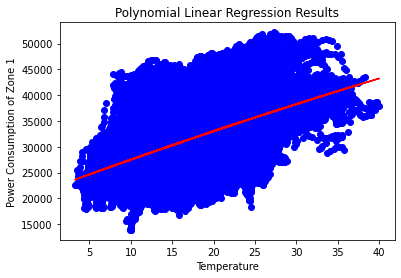

MSE: 40987224.27130776
R2 score: 0.1938623515269019


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#preparing the data
X = tetuan['Temperature'].values.reshape(-1, 1)
y = tetuan['Zone 1 Power Consumption'].values.reshape(-1, 1)

#fitting the polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

#predicting results
#poly_pred=poly_reg.predict(poly.fit_transform(X))

#plotting the results
plt.scatter(X, y, color='blue')
plt.plot(X, poly_reg.predict(poly.fit_transform(X)), color='red')
plt.title('Polynomial Linear Regression Results')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption of Zone 1')
plt.show()

#checking mse, r2
r2 = poly_reg.score(X_poly, y)

#printing the metrics
print("MSE:", mse)
print("R2 score:", r2)

The results of PLR seem similar to linear regression.

##3.  Use 'Temperature' as the independent variable and 'power consumption of Zone 1' as the dependent variable to conduct a polynomial linear regression with regularized term of your choice (Ridge, Lasso, or Elastic Net).

Ridge regression, Lasso regression, and Elastic Net are all techniques used for regression analysis, particularly when there are high multicollinearity or overfitting issues in the dataset.

Ridge is suitable when all variables are important and there is no feature selection required. Lasso is more useful when some variables can be discarded as irrelevant. Elastic Net is useful when the dataset is large and has many variables, some of which may be correlated with each other.

For our set of variables, we will use ridge.

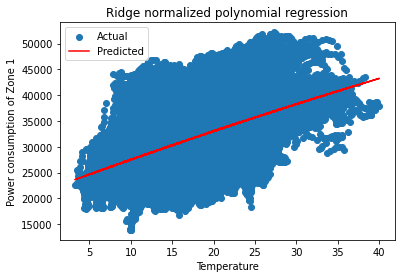

In [ ]:
#importing necessary libraries
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

#preparing the data
X = tetuan['Temperature'].values.reshape(-1, 1)
y = tetuan['Zone 1 Power Consumption'].values.reshape(-1, 1)

#fitting the polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#defining regularization parameter
alpha = 0.05

#creating a Ridge regression model with polynomial features
model = make_pipeline(poly, Ridge(alpha=alpha))

#fitting the model on the training data
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

#predicting the power consumption of Zone 1 for the given temperatures using fitted model
y_pred = poly_reg.predict(X_poly)

#plotting results
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Power consumption of Zone 1')
plt.title('Ridge normalized polynomial regression')
plt.legend()
plt.show()


In [ ]:
#calculating the mean squared error of the model
mse = mean_squared_error(y, y_pred)
print(f"Mean squared error: {mse}")

#calculating r2 value
r2 = poly_reg.score(X_poly, y)
print('R-squared:', r2)

Mean squared error: 40987224.27130776
R-squared: 0.1938623515269019


##4. Use any combination of independent variables in ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows'], to predict 'power consumption of Zone 1'.


For this question, we will use all the variables and then implement the LR model along with Elastic Net regularisation as there are multiple X variables present.

Let us also predict the true values against the model's predictions to see how they vary and finally calculate the R2 score.

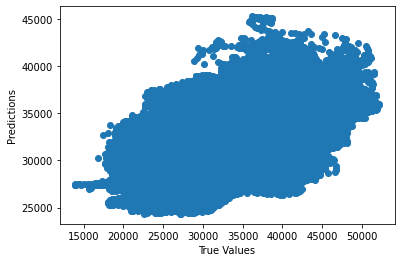

R2 score: 0.20648971864619325


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#defining independent and dependent variables
X = tetuan[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']]
y = tetuan['Zone 1 Power Consumption']

#normalising the independent variables using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#training the Elastic Net based regression model
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_scaled, y)

#making predictions on the training set
y_pred = enet.predict(X_scaled)

#plotting the results
plt.scatter(y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#evaluating the model using R2
r2 = r2_score(y, y_pred)
print('R2 score:', r2)

The R2 value here is barely better than our past R2 values. This new model is definitely a better fit but not significantly so.


##5.  Summarize your findings.

#**SUMMARY:**

In this tutorial, we explored Linear Regression, Polynomial Linear Regression and Regularised Regression concepts to predict the power consumption of Zone 1 in Tetuan city. In some cases, we used 1 independent variable while in other cases we use multiple independent variables.


1.   On checking for assumptions with respect to linear regression (Question 1), it was found that there was a weak linear relationship between x and y variables, and the residual curve also had a weak normal distribution. The first model also had an R2 score was 0.19 which rendered it a poor fit for our data. When checking for assumption 3, it was found that the residuals were randomly scattered around the horizontal line at zero, with no discernible pattern or trend. Finally, assumption 4 (independence) was proven correct.

2.   Coming to the polynomial regression (Question 2), the four assumptions were almost same. The additional assumption of multicollinearity was redundant because there was only one independent variable involved.

3.   For the third case (Question 3), we used Ridge normalization-based regression model which is generally used to tackle the issue of multicollinearity. Since this case also involves ONE independent variable, our result were not so special either.

4.   In the final case (Question 4), we used Elastic Net-based regression model to predict y based on multiple input variables. In this case, we observed that the R2 score increased by a small number. Although that makes the final model more suitable than its predecessors, we cannot conclude that this model is significantly better without further analysis.
